# Learning the bias of a coin: Beta-Bernoulli Model

`Krishnamurthy Iyer
Cornell University`

---

### Preliminaries


The `math` module loads all the basic mathematical functions, like sqrt, exp, etc.

In [2]:
import math

In the following we load the numpy module, needed to work with arrays and get access to a variety of numerical methods. We also import the beta function from Scipy stats package.

In [3]:
import numpy as np
from scipy.stats import beta

Matplotlib is a Python plotting package.

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

The following is needed to obtain an interactive plot.

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

---

# Introduction

We have come across a brand new coin, and would like to know learn more about it. In particular, we would like to figure out the probability with which a toss of the coin would come out HEADS. We denote this probability, known as the `bias` of the coin, $\bar{\omega}$. 

Note that $\bar{\omega}$ can theoretically be any value in the interval $[0,1]$. We discretize the interval [0,1] into a fine grid $\{0,\frac{1}{k}, \frac{2}{k}, \cdots, \frac{k-1}{k}, 1\}$ for numerical computation. The command 'linspace' from numpy creates such a grid.

In [6]:
numMesh=100
omega = np.linspace(0,1,numMesh+1)
omega

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

#### Prior belief

Since the coin is brand new, we have no prior information about $\bar{\omega}$. To model this state of complete ignorance, we let our prior belief about $\bar{\omega}$ be given by the $\mathsf{Uniform}[0,1]$ distribution. Essentially, this distribution reflects our belief that all values of the bias are equally likely.

<IPython.core.display.Javascript object>


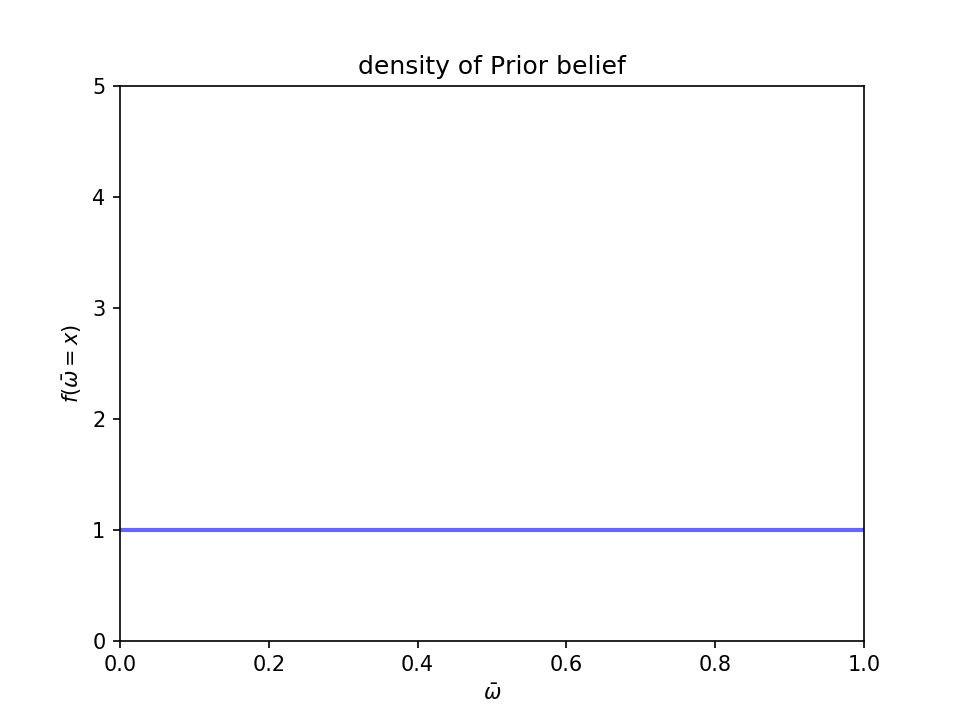

In [7]:
def uniform_density(x):
    return 1.0
prior = np.vectorize(uniform_density)

plt.figure()
plt.xlabel(r'$\bar{\omega}$')
plt.ylabel(r'$f(\bar{\omega}=x)$')
plt.title('density of Prior belief')
plt.axis([0,1,0,5])
plt.plot(omega,prior(omega),'b-', lw=2, alpha=0.6)
plt.show()

---
#### Observations

Our observations are coin tosses, represented as $\{0,1\}$ random variables, where $1$ represents HEADS and $0$ represents TAILS. Such random variables are called Bernoulli random variable. Let $\bar{s}_n$ denote the outcome of the $n^{th}$ coin toss. Note that we have

\begin{align*}
P(\bar{s}_n = 1| \bar{\omega} =x) = x, \quad \text{for all $x \in [0,1]$.}
\end{align*}

In other words, if we knew the bias $\bar{\omega}$ is equal to some value $x$, then the probability that the coin toss comes out HEADS is equal to that bias $x$.

Note also that we have <i>conditional independence</i>: if we knew the bias $\bar{\omega}$, the sequence of coin tosses are independent. In other words, we have

\begin{align*}
P(\bar{s}_1 = s_1, \bar{s}_2 = s_2, \cdots, \bar{s}_n = s_n | \bar{\omega} = x) = P(\bar{s}_1 = s_1 | \bar{\omega} = x) \cdot P( \bar{s}_2 = s_2| \bar{\omega} = x) \cdots P(\bar{s}_n = s_n | \bar{\omega} = x),
\end{align*}

where each $s_i \in \{0,1\}$.

---

#### Posterior updates

Suppose the first coin toss came up heads, i.e., $\bar{s}_1  =1$. Given this observation, our posterior belief about the bias $\bar{\omega}$ can be found using Bayes' Rule:

\begin{align*}
f(\bar{\omega}=x| \bar{s}_1 = 1) = \frac{  P(\bar{s}_1 = 1 | \bar{\omega}=x)\cdot f(\bar{\omega}=x)}{P(\bar{s}_1 = 1)} = \frac{x\cdot 1}{P(\bar{s}_1 = 1)}.
\end{align*}

Since $P(\bar{s}_1 = 1) = \frac{1}{2}$, we have $f(\bar{\omega}=x| \bar{s}_1 = 1) = 2x$. 

<IPython.core.display.Javascript object>


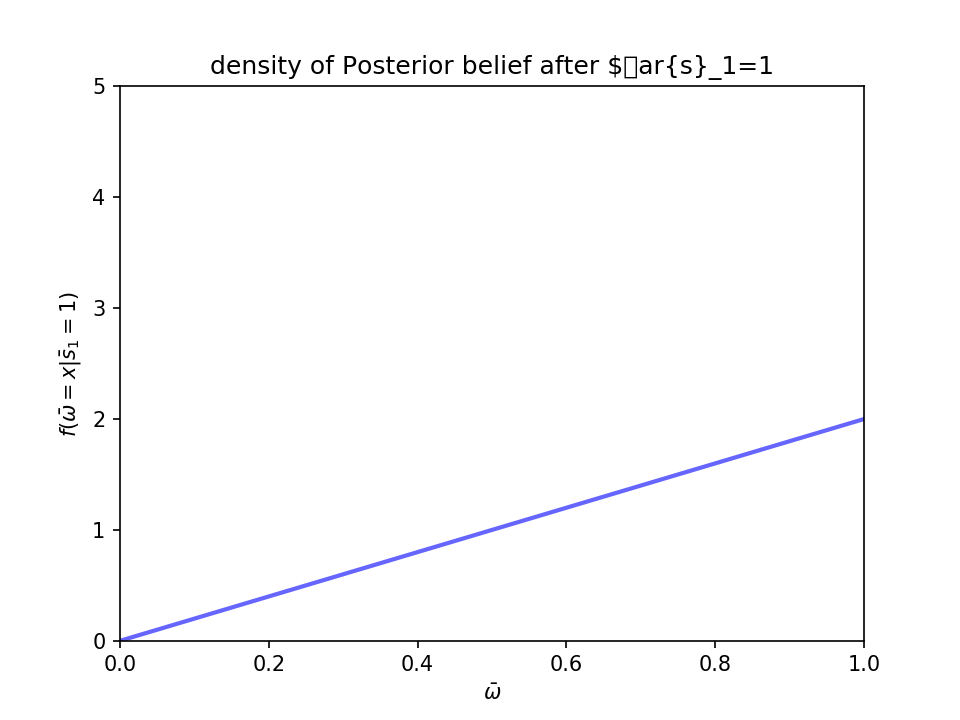

In [8]:
def oneHeads(x):
    return 2*x
oneHeadsPosterior = np.vectorize(oneHeads)

plt.figure()
plt.xlabel(r'$\bar{\omega}$')
plt.ylabel(r'$f(\bar{\omega}=x| \bar{s}_1 = 1)$')
plt.title('density of Posterior belief after $\bar{s}_1=1')
plt.plot(omega,oneHeadsPosterior(omega),'b-', lw=2, alpha=0.6, label='density' )
plt.axis([0,1,0,5])
plt.show()

---
If instead $\bar{s}_1 = 0$, i.e., the first coin toss were TAILS, then the posterior belief, from Bayes Rule, is given by $f(\bar{\omega} = x | \bar{s}_1 = 0) = 2(1-x)$.

<IPython.core.display.Javascript object>


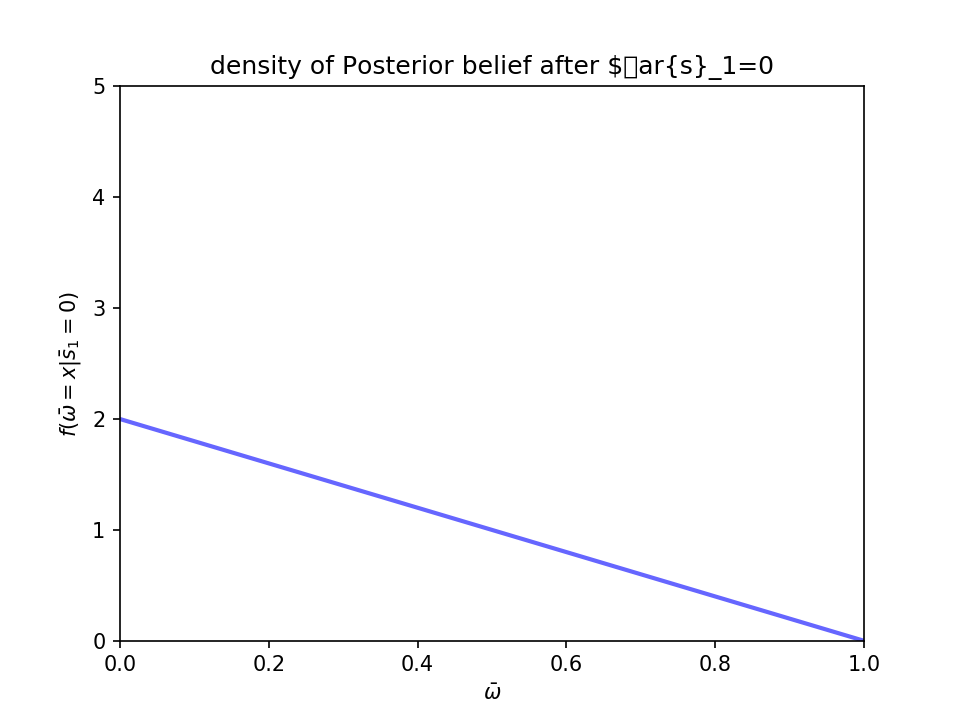

In [9]:
def oneTails(x):
    return 2*(1-x)
oneTailsPosterior = np.vectorize(oneTails)

plt.figure()
plt.xlabel(r'$\bar{\omega}$')
plt.ylabel(r'$f(\bar{\omega}=x| \bar{s}_1 = 0)$')
plt.title('density of Posterior belief after $\bar{s}_1=0')
plt.plot(omega,oneTailsPosterior(omega),'b-', lw=2, alpha=0.6, label='density' )
plt.axis([0,1,0,5])
plt.show()

Suppose now the first coin toss is HEADS, i.e., $\bar{s}_1 = 1$, and the second coin toss is TAILS, i.e., $\bar{s}_2 = 0$. The posterior belief about $\bar{\omega}$  can once again be found using Bayes' rule:

\begin{align*}
f(\bar{\omega} = x | \bar{s}_1 = 1, \bar{s}_2 = 0) = \frac{ P(\bar{s}_2 = 0 | \bar{\omega} = x, \bar{s}_1 = 1)\cdot f(\bar{\omega} = x |\bar{s}_1 = 1)}{P(\bar{s}_2 = 0|\bar{s}_1 = 1)} = \frac{(1-x)\cdot 2x}{P(\bar{s}_2 = 0|\bar{s}_1 = 1)} = 6x(1-x).
\end{align*}


<IPython.core.display.Javascript object>


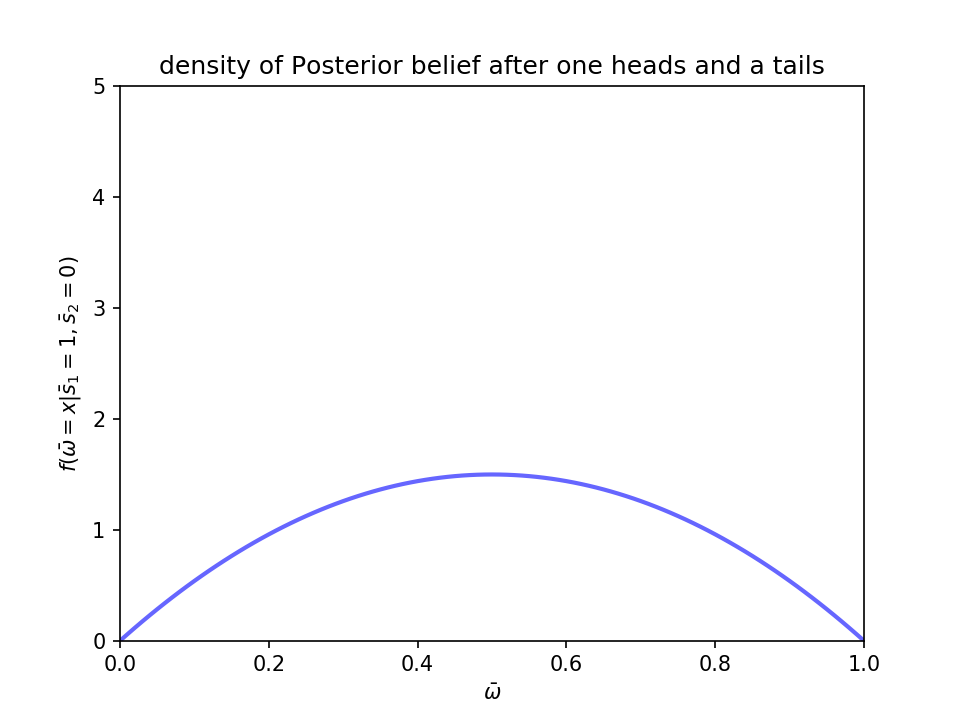

In [10]:
def oneH1T(x):
    return 6*x*(1-x)
oneH1TPosterior = np.vectorize(oneH1T)

plt.figure()
plt.xlabel(r'$\bar{\omega}$')
plt.ylabel(r'$f(\bar{\omega}=x| \bar{s}_1 = 1,\bar{s}_2=0)$')
plt.title('density of Posterior belief after one heads and a tails')
plt.plot(omega,oneH1TPosterior(omega),'b-', lw=2, alpha=0.6, label='density' )
plt.axis([0,1,0,5])
plt.show()

One can verify that the posterior is the same if the first coin toss had been TAILS and the second one had been HEADS, i.e., $\bar{s}_1 = 0$ and $\bar{s}_2 = 1$.

In general, the posterior belief after some number of coin tosses only depends on the number of HEADS and number of TAILS seen (and not on the order in which they occur). If after tossing the coin $N$ times, suppose we observe $a$ HEADS and $b$ TAILS. Then, the posterior belief about $\bar{\omega}$ is given by 

\begin{align*}
f(\bar{\omega} = x | a~HEADS, b~TAILS) = \frac{P(a~HEADS, b~TAILS | \bar{\omega}= x) \cdot f(\bar{\omega} = x)}{P(a~HEADS, b~TAILS)} = \frac{{N\choose a} x^a (1-x)^b }{P(a~HEADS, b~TAILS)} = \frac{x^a (1-x)^b}{ C},
\end{align*}

where $C$ is a normalizing constant that depends on $a$ and $b$, and is given by $C = \int_0^1 u^a (1-u)^b du$. (This expression follows from the law of total probability.) 

For example, suppose after tossing the coin 100 times, suppose we saw 63 HEADS, and 37 TAILS. Then, our posterior is given by

\begin{align*}
f(\bar{\omega} = x | a~HEADS, b~TAILS) = \frac{x^{63}(1-x)^{37}}{K},
\end{align*}

where $K = \int_0^1 x^{63}(1-x)^{37} dx$. The posterior distribution is plotted below.

<IPython.core.display.Javascript object>


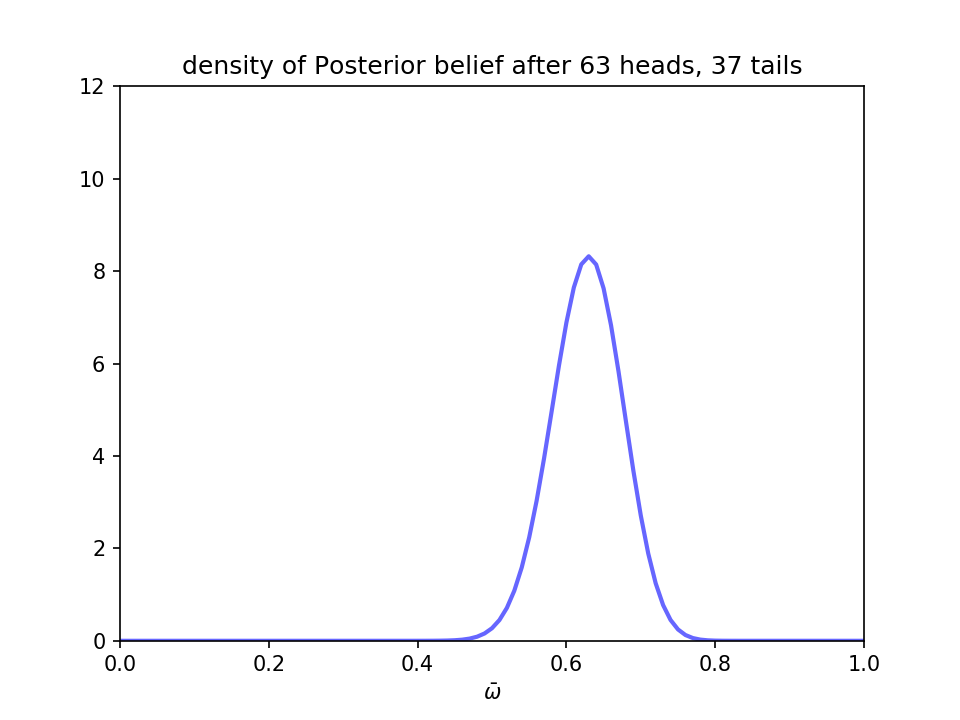

In [11]:
plt.figure()
plt.xlabel(r'$\bar{\omega}$')
plt.title('density of Posterior belief after 63 heads, 37 tails')
plt.plot(omega,beta.pdf(omega,64 ,38),'b-', lw=2, alpha=0.6)
plt.axis([0,1,0,12])
plt.show()

Beta distributions
---

All the posterior distributions we have obtained belong to a class of distributions called Beta distributions. Any Beta distribution is fully specified by two non-negative parameters $\alpha$ and $\beta$. In particular, the posterior obtained above, after $a$ HEADS and $b$ TAILS and starting from an uniform prior, is the $\mathsf{Beta}(\alpha,\beta)$ distribution, where $\alpha = 1 + a$ and $\beta = 1 + b$. (This offset by $1$ is due to historial reasons.)


The density of the $\mathsf{Beta}(\alpha,\beta)$ distribution at the value $x$ is given by

\begin{align*}
\mathsf{Beta}(x,\alpha, \beta) = \frac{x^{\alpha -1} (1-x)^{\beta -1}}{B(\alpha, \beta)}.
\end{align*}



Here, recall that $B(\alpha, \beta)$ is a normalizing constant, defined as $B(\alpha, \beta) = \int_0^1 x^{\alpha -1} (1-x)^{\beta -1} dx$. In fact, when $\alpha$ and $\beta$ are integers, one can compute this integral's value to be

\begin{align*}
B(\alpha, \beta) = \frac{ (\alpha-1)! (\beta -1)!}{(\alpha + \beta -1)!}.
\end{align*}

Our prior distribution is itself a Beta distribution, namely the $\mathsf{Beta}(1,1)$. In other words, our prior distribution can be thought of as the "posterior after 0 coin tosses, seeing 0 HEADS and 0 TAILS".


The scipy function beta.pdf(x,$\alpha$,$\beta$) computes the density $\mathsf{Beta}(x,\alpha, \beta)$. 
Below you can see the plot for the Beta distribution for different values of HEADS and TAILS.

<IPython.core.display.Javascript object>


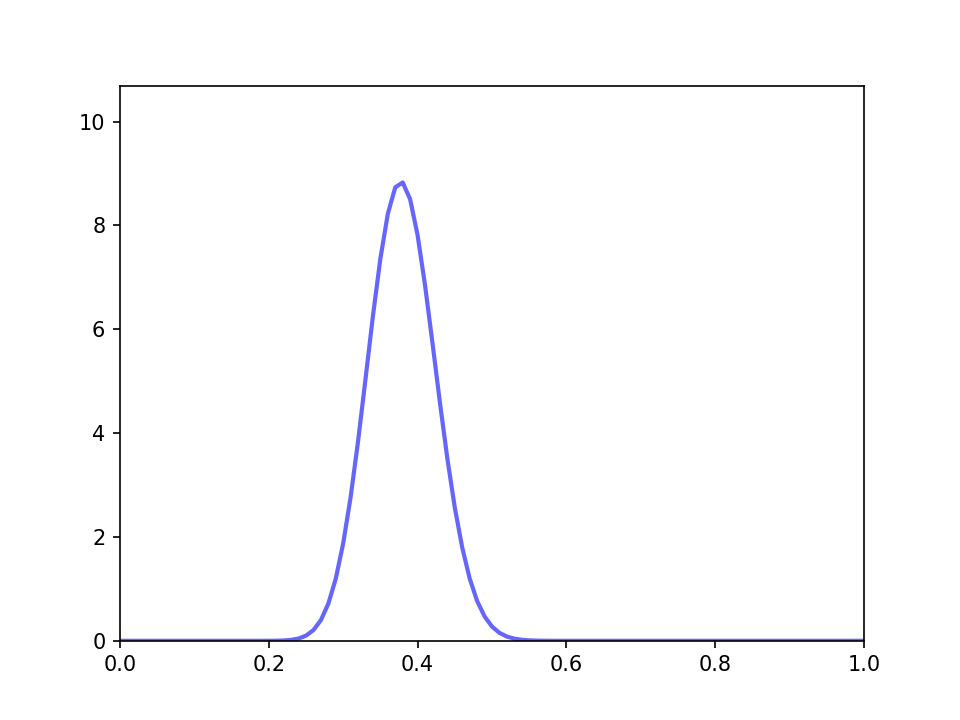

In [12]:
fig = plt.figure()
fig.clf()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(omega,beta.pdf(omega,1,1),'b-', lw=2, alpha=0.6, label='density' )

def update(numHead = 1.0, numTail=2.0):
    numToss = numHead + numTail
    line.set_ydata(beta.pdf(omega,1+numHead,1+numTail))
    ax.axis([0,1,0,max(5,math.sqrt(numToss))])
    fig.canvas.draw()
    
wwa = widgets.IntSlider(min=0,max=100,step=1,value=0)
wwb = widgets.IntSlider(min=0,max=100,step=1,value=0)
interact(update,numHead=wwa,numTail=wwb);
